<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/Planejamento_Vendas-Analise-De-Take-up-Rate/blob/main/Planejamento_Vendas_Analise_de_Take_up_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Pegamos dados aleatórios de vendedores gerados aleatóriamente, para fazer uma analise exploratória. O objetivo desse material é explorar outras alternativas dos dados, mesmo não conhecendo totalmente as regras de negócio, podemos obter insights para novas abordagens e tomada de decisão.*

Dados complementares:
Cada filial tem um custo total de operaçao de R$ 1.2 milhões
O nível de rentabilidade de um cliente é definido pelo Take-up Rate (Índice% resultante da divisão Receita/Volume).

Vamos calcular o Take-up Rate e fazer outras abordagens.

In [1]:
# Carregar pacotes necessários
library(readxl)
library(dplyr)
library(tidyverse)
library(ggplot2)

# Carregar os dados das tabelas
faturamento <- read_excel("/faturamento.xlsx")
filial <- read_excel("/filial.xlsx")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ stringr 1.5.0
✔ tidyr   1.3.0     ✔ forcats 1.0.0
✔ readr   2.1.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: ignored

In [ ]:
# Visualizar as primeiras linhas dos dados
head(faturamento)


CodigoCliente,cliente,canais,executivo,Faturamento
<dbl>,<chr>,<chr>,<chr>,<dbl>
2127,PROSEGUR RS,GESTAO,FLAVIA REGINA LEITE MARINHO,10676.36
2175,SIMPALA VEICULOS SA,VAREJO,ALINE GOTTSCHALK DE OLIVEIRA FIDELIZACAO,2180.67
2321,FDRH,M. PUBLICO,NEIRI MARIO SCHENCKEL,250.00
2469,MUDANCAS GIULIAN,EXPERS,NAIANA CECILIA STROTTMANN FIDELIZACAO,14042.47
2662,CARHOUSE VEICULOS LTDA,GESTAO,VANIA PAULO DA SILVA RUCKERT FIDELIZACAO,719.32
3096,EDITORA FTD,GESTAO,SUELEN TAIS ARAUJO DA ROSA FIDELIZACAO,3276.94


In [ ]:
head(filial)

filial,CodigoCliente,NomeCliente
<chr>,<dbl>,<chr>
SP CAP,2127,PROSEGUR RS
MATRIZ,2175,SIMPALA VEICULOS SA
RS,2321,FDRH
MATRIZ,2469,MUDANCAS GIULIAN
MATRIZ,2662,CARHOUSE VEICULOS LTDA
MATRIZ,3096,EDITORA FTD


# Tratamento dos dados

In [ ]:
# Relacionar as tabelas "Faturamento" e "Filial" pelo código do cliente
dados_completos <- inner_join(faturamento, filial, by = "CodigoCliente")

In [ ]:
head(dados_completos)

CodigoCliente,cliente,canais,executivo,Faturamento,filial,NomeCliente
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
2127,PROSEGUR RS,GESTAO,FLAVIA REGINA LEITE MARINHO,10676.36,SP CAP,PROSEGUR RS
2175,SIMPALA VEICULOS SA,VAREJO,ALINE GOTTSCHALK DE OLIVEIRA FIDELIZACAO,2180.67,MATRIZ,SIMPALA VEICULOS SA
2321,FDRH,M. PUBLICO,NEIRI MARIO SCHENCKEL,250.00,RS,FDRH
2469,MUDANCAS GIULIAN,EXPERS,NAIANA CECILIA STROTTMANN FIDELIZACAO,14042.47,MATRIZ,MUDANCAS GIULIAN
2662,CARHOUSE VEICULOS LTDA,GESTAO,VANIA PAULO DA SILVA RUCKERT FIDELIZACAO,719.32,MATRIZ,CARHOUSE VEICULOS LTDA
3096,EDITORA FTD,GESTAO,SUELEN TAIS ARAUJO DA ROSA FIDELIZACAO,3276.94,MATRIZ,EDITORA FTD


In [ ]:
attach(dados_completos)

In [ ]:
# Verificando a presença de Valores faltantes
dados_completos <- dados_completos %>%
  mutate(Faturamento = as.numeric(Faturamento))

In [ ]:
is.na(Faturamento)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [13] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
 [25]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [49]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
 [85] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[109] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[133] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
[145] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[181] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[217] FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
[229] FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[241] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
[277] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[289]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE

In [ ]:
# Nessa etapa eu removi os NA, mas existem outras tratativas que podem ser aplicadas, dependendo da regra e o contexto do negócio.

dados_completos <- dados_completos[complete.cases(dados_completos$Faturamento), ]

In [ ]:
head(dados_completos)

CodigoCliente,cliente,canais,executivo,Faturamento,filial,NomeCliente
<dbl>,<chr>,<fct>,<chr>,<dbl>,<fct>,<chr>
2127,PROSEGUR RS,GESTAO,FLAVIA REGINA LEITE MARINHO,10676.36,SP CAP,PROSEGUR RS
2175,SIMPALA VEICULOS SA,VAREJO,ALINE GOTTSCHALK DE OLIVEIRA FIDELIZACAO,2180.67,MATRIZ,SIMPALA VEICULOS SA
2321,FDRH,M. PUBLICO,NEIRI MARIO SCHENCKEL,250.00,RS,FDRH
2469,MUDANCAS GIULIAN,EXPERS,NAIANA CECILIA STROTTMANN FIDELIZACAO,14042.47,MATRIZ,MUDANCAS GIULIAN
2662,CARHOUSE VEICULOS LTDA,GESTAO,VANIA PAULO DA SILVA RUCKERT FIDELIZACAO,719.32,MATRIZ,CARHOUSE VEICULOS LTDA
3096,EDITORA FTD,GESTAO,SUELEN TAIS ARAUJO DA ROSA FIDELIZACAO,3276.94,MATRIZ,EDITORA FTD


# Analise Exploratória

In [ ]:
# Agrupamento dos dados por filial
dados_agrupados <- dados_completos %>%
  group_by(filial) %>%
  summarise(TotalFaturamento = sum(Faturamento)) %>%
  arrange(desc(TotalFaturamento))

dados_agrupados

filial,TotalFaturamento
<fct>,<dbl>
MATRIZ,1675450.24
PR,1571689.65
MG,1282971.91
SP CAP,889328.42
SP INT,631450.22
GO,493577.17
CE,363624.78
RJ,266276.63
PE,133370.83


In [ ]:
# Agrupamento dos dados por canais
dados_agrupados2 <- dados_completos %>%
  group_by(canais) %>%
  summarise(TotalFaturamento = sum(Faturamento)) %>%
  arrange(desc(TotalFaturamento))

dados_agrupados2

canais,TotalFaturamento
<fct>,<dbl>
GESTAO,3682663.340
EXPERS,3625300.620
VAREJO,39962.500
M. PUBLICO,-1537.281


In [ ]:
# Agrupamento por filiais e canais
dados_agrupados1 <- dados_completos %>%
  group_by(filial, canais) %>%
  summarise(TotalFaturamento = sum(Faturamento)) %>%
  pivot_wider(names_from = canais, values_from = TotalFaturamento, values_fill = 0)

dados_agrupados1

`summarise()` has grouped output by 'filial'. You can override using the
`.groups` argument.


filial,GESTAO,M. PUBLICO,EXPERS,VAREJO
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
BA,69012.63,0.000,0.00,0.0
CE,363624.78,0.000,0.00,0.0
GO,52000.35,-9392.882,450969.70,0.0
MATRIZ,1536520.75,41752.113,57214.88,39962.5
MG,563629.01,0.000,719342.90,0.0
PA,0.00,-54240.159,0.00,0.0
PE,78203.52,379.900,54787.41,0.0
PR,189525.25,0.000,1382164.40,0.0
RJ,261617.93,0.000,4658.70,0.0


In [ ]:
# tirar números com notação cientírica
options(scipen = 999)

# Analise Descritiva
*Nessa etapa vamos fazer uma análise descritiva dos dados, para entender se existem outiliers na base.A análise descritiva é fundamental para qualquer outra etapa posterior.*
*Dois graficos que mostram bem o comportamento dos nossos dados e o boxplot e o grafico de barras, onde ocnseguimos ver a distribuição.*

*Com o boxplot podemos observar a presença de outiliers e com o histograma se os nossos dados tem uma distribuição normal.*

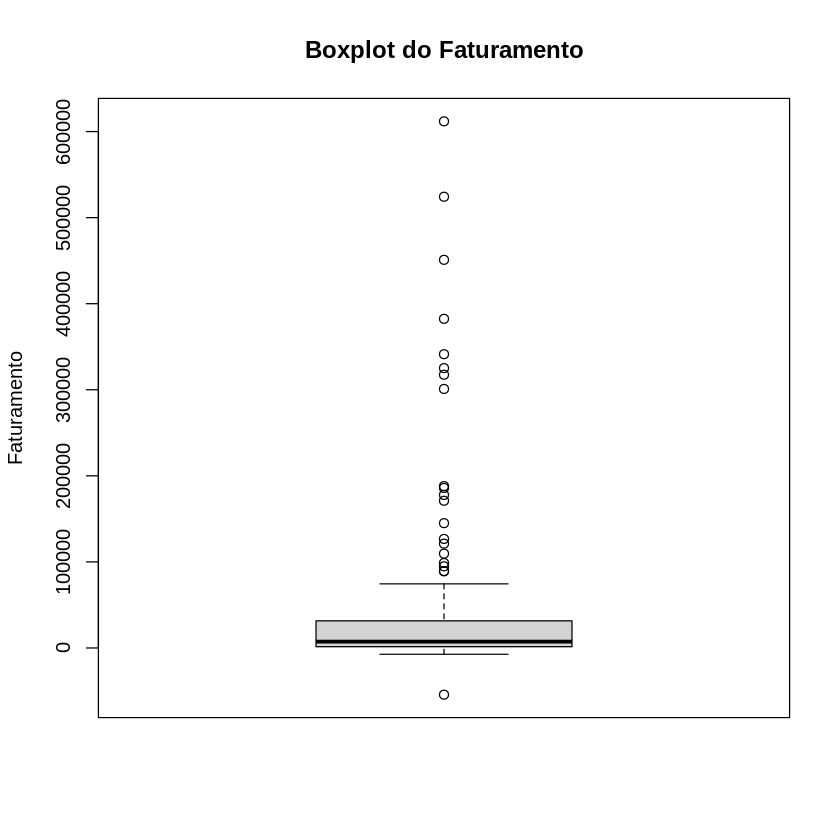

In [ ]:
# Observamos existe a presença de alguns outliers na nossa base.
# O mais preocupante é que existe valores negativos como outlier, esse é um ponto importante para invertigarmos
boxplot(dados_completos$Faturamento, main = "Boxplot do Faturamento", ylab = "Faturamento")


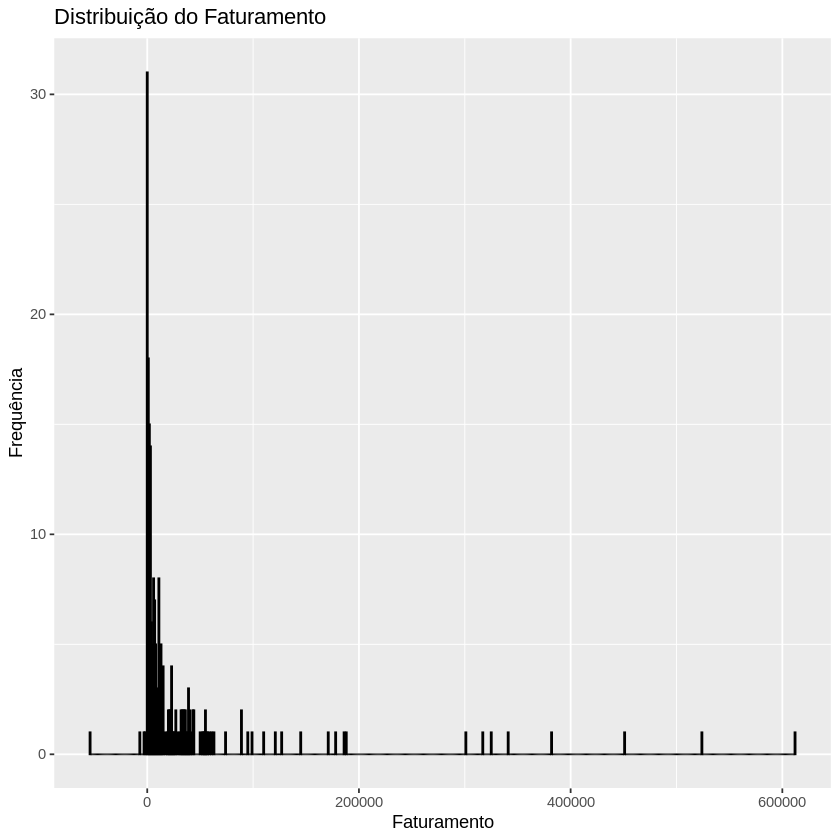

In [ ]:
# Histograma - Para entendermos a distribuição dos dados
ggplot(dados_completos, aes(x = Faturamento)) +
  geom_histogram(binwidth = 1000, fill = "blue", color = "black") +
  labs(title = "Distribuição do Faturamento", x = "Faturamento", y = "Frequência")

# Outliers
*Vamos identificar os outiliers tanto positivos quanto negativos e saber quem são os Executivos.*

In [ ]:
# Calcular os limites superior e inferior
Q1 <- quantile(dados_completos$Faturamento, 0.25)
Q3 <- quantile(dados_completos$Faturamento, 0.75)
IQR <- Q3 - Q1
limite_inferior <- Q1 - 1.5 * IQR
limite_superior <- Q3 + 1.5 * IQR

# Identificar linhas com outliers
outliers <- dados_completos[dados_completos$Faturamento < limite_inferior | dados_completos$Faturamento > limite_superior, ]

In [ ]:
# Exibir as linhas com outliers
outliers

CodigoCliente,cliente,canais,executivo,Faturamento,filial,NomeCliente
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
6862,RAPIDO TRANSPAULO LTDA,EXPERS,DAIANE GOMES FALCAO,382434.33,PR,RAPIDO TRANSPAULO LTDA
9112,MULTITRANS,EXPERS,DAIANE GOMES FALCAO,300966.06,PR,MULTITRANS
10166,ENGELMIG,GESTAO,MARINA DAMAZIO GODOY DE ABREU,341319.80,MG,ENGELMIG
14246,ELETRONORTE TUCURUI,M. PUBLICO,FRANCISCO EUGENIO FREITAS RODRIGUES,-54240.16,PA,ELETRONORTE TUCURUI
14304,COMERCIO E TRANSPORTES MIORANZA LTDA,EXPERS,DAIANE GOMES FALCAO,325155.61,PR,COMERCIO E TRANSPORTES MIORANZA LTDA
23825,CDA GUARULHOS,GESTAO,JAQUELINE CRISTINA ALVES ASSIS,126705.62,SP INT,CDA GUARULHOS
27340,FARMACE,GESTAO,EDUARDO PEREIRA SILVA,94897.98,CE,FARMACE
27843,SULINA,EXPERS,DAIANE GOMES FALCAO,317481.51,PR,SULINA
34161,CARVALIMA TRANSPORTES,EXPERS,ELIANA DAL PONTE FARIAS,450969.70,GO,CARVALIMA TRANSPORTES


# Analise Exploratória

*Como temos apenas uma variavel numérica, vamos realizar a análise de variância (ANOVA) para comparar as médias do faturamento entre os diferentes níveis da variável categórica, como filiais e canais.*



# Análise de variância (ANOVA)
*A Análise de Variância (ANOVA) é um teste estatístico chave e muito útil para análise de datasets em diversas áreas do conhecimento. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente.*

# Legenda
*Df: Os graus de liberdade indicam o número de grupos (filiais ou canais) e o número de observações restantes (residuals).*

*Sum Sq: A soma dos quadrados representa a variabilidade total explicada pela variável "filial/canais" e a variabilidade não explicada (residual).*

*Mean Sq: A média dos quadrados é calculada dividindo a soma dos quadrados pelos graus de liberdade correspondentes.*

*F value: O valor F é uma medida da diferença entre as médias dos grupos e a variabilidade dentro dos grupos.*

*Pr(>F): O valor p representa a probabilidade de obter uma estatística F igual ou mais extrema do que a observada, assumindo que a hipótese nula seja verdadeira. Um valor de p pequeno (geralmente menor que 0,05) indica uma diferença estatisticamente significativa*

In [ ]:
# Realizar a análise de variância
modelo_anova <- aov(Faturamento ~ filial, data = dados_completos)

# Resumo do modelo ANOVA
resumo_anova <- summary(modelo_anova)


# Exibir o resumo do modelo ANOVA
print(resumo_anova)


             Df        Sum Sq     Mean Sq F value       Pr(>F)    
filial       11  361206888442 32836989858   5.905 0.0000000268 ***
Residuals   201 1117749931031  5560944931                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


*No caso das filiais, o resultado mostra um valor de p muito pequeno (p = 0.0000000268), indicando que há uma diferença estatisticamente significativa nas médias do faturamento entre as filiais. Isso sugere que a variável "filial" está associada ao faturamento e pode ser um fator importante na determinação das diferenças observadas.*

*É importante observar que devemos interpretar esses resultados considerando o contexto específico do conjunto de dados e o objetivo da análise. A análise de variância é útil para testar diferenças entre grupos, Podem ser feitas  análises adicionais, como testes de comparação múltipla, para identificar quais filiais têm médias de faturamento significativamente diferentes umas das outras.*

In [ ]:
# Realizar a análise de variância
modelo_anova1 <- aov(Faturamento ~ canais, data = dados_completos)

# Resumo do modelo ANOVA
resumo_anova1 <- summary(modelo_anova1)

# Exibir o resumo do modelo ANOVA
print(resumo_anova1)

             Df        Sum Sq      Mean Sq F value              Pr(>F)    
canais        3  476970850580 158990283527   33.16 <0.0000000000000002 ***
Residuals   209 1001985968893   4794191239                                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


*No caso dos canais, o resultado mostra um valor de p muito pequeno (p < 0.0000000000000002), indicando que há uma diferença estatisticamente significativa nas médias do faturamento entre os canais. Isso sugere que a variável "canais" está associada ao faturamento e pode ser um fator importante na determinação das diferenças observadas.*

*Assim como no caso das filiais, é importante observar devemos interpretar esses resultados considerando o contexto específico do conjunto de dados e o objetivo da análise.*




